In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Temperature

In [2]:
def softmax_with_temperature(logits, temperature=1.0):
    """
    Calculates the softmax of a vector with a temperature parameter.

    Args:
      logits: A numpy array of raw scores.
      temperature: A float controlling the sharpness of the distribution.
                   Must be non-negative.

    Returns:
      A numpy array representing the probability distribution.
    """
    # Handle the edge case of greedy decoding (temperature = 0)
    if temperature == 0:
        probs = np.zeros_like(logits)
        probs[np.argmax(logits)] = 1.0
        return probs

    # For numerical stability, subtract the max logit before exponentiating (this does not change resulting values)
    scaled_logits = (logits - np.max(logits)) / temperature

    # Calculate the exponentiated values
    exp_logits = np.exp(scaled_logits)

    # Normalize to get the final probabilities
    probabilities = exp_logits / np.sum(exp_logits)

    return probabilities

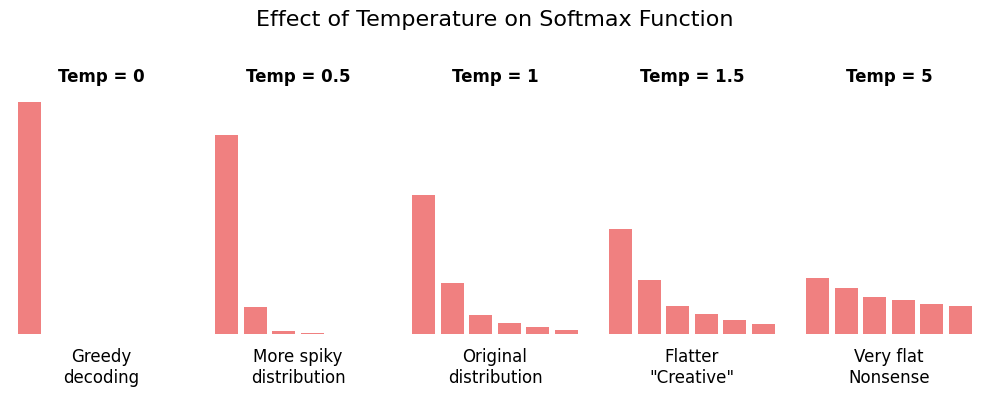

In [3]:
# 1. Define the initial logits (raw scores from a model)
# These values are chosen to create a descending distribution
initial_logits = np.array([4.0, 3.0, 2.0, 1.5, 1.0, 0.5])

# 2. Define the different temperatures to test
temperatures = [0, 0.5, 1, 1.5, 5]
descriptions = {
    0: "Greedy\ndecoding",
    0.5: "More spiky\ndistribution",
    1: "Original\ndistribution",
    1.5: "Flatter\n\"Creative\"",
    5: "Very flat\nNonsense"
}

# 3. Set up the plot to display the results
num_plots = len(temperatures)
fig, axes = plt.subplots(1, num_plots, figsize=(10, 4))
fig.suptitle('Effect of Temperature on Softmax Function', fontsize=16)


# 4. Iterate through each temperature, calculate softmax, and plot the result
for i, temp in enumerate(temperatures):
    # Calculate the probability distribution
    probabilities = softmax_with_temperature(initial_logits, temperature=temp)

    # Select the subplot to draw on
    ax = axes[i]

    # Create the bar chart
    x_positions = np.arange(len(initial_logits))
    ax.bar(x_positions, probabilities, color='lightcoral', align='center')

    # --- Formatting the plot ---
    # Set titles and labels
    ax.set_title(f"Temp = {temp}", fontweight='bold')
    ax.set_xlabel(descriptions[temp], fontsize=12, labelpad=10)

    # Remove axis ticks and borders for a cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Ensure all plots have the same y-axis scale for fair comparison
    ax.set_ylim(0, 1.05)

# Show the final visualization
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Top-K

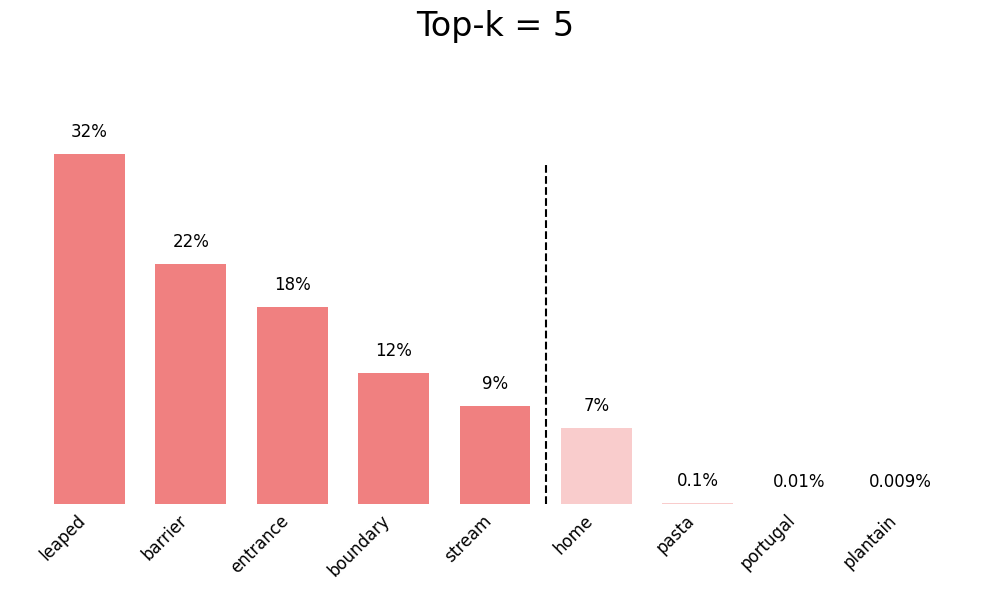

In [4]:
top_k = 5

# Sample text and percentages to play with
words = ['leaped', 'barrier', 'entrance', 'boundary', 'stream', 'home', 'pasta', 'portugal', 'plantain']
percentages = [32, 22, 18, 12, 9, 7, 0.1, 0.01, 0.009]


# Define colors for the bars
# The first top_k bars are solid, the rest are semi-transparent
solid_color = '#F08080'  # lightcoral
transparent_color = (0.941, 0.502, 0.502, 0.4) # RGBA version of the solid color with alpha
colors = [solid_color] * top_k + [transparent_color] * (len(words) - top_k)

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
ax.set_facecolor('white')

# Create the bar plot
bars = ax.bar(words, percentages, color=colors, width=0.7)

# Add the percentage labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    # Format the label string based on the value
    if percentages[i] >= 1:
        label = f'{int(percentages[i])}%'
    else:
        label = f'{percentages[i]}%'

    ax.text(bar.get_x() + bar.get_width() / 2.0, height + 1.2, label,
            ha='center', va='bottom', fontsize=12, color='black')

# Add the vertical dashed line to separate the Top-k
# The line is placed between the k-th and (k+1)-th bar
ax.axvline(x=top_k - 0.5, color='black', linestyle='--', ymax=0.8)

# Set the main title of the plot
ax.set_title(f'Top-k = {top_k}', fontsize=24, pad=30, color='black')

# Remove the y-axis completely
ax.get_yaxis().set_visible(False)

# Remove the chart borders (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', labelsize=12, labelcolor='black', pad=5)
plt.xticks(rotation=45, ha='right')

# Set the y-limit to create some padding at the top
ax.set_ylim(0, max(percentages) + 7)

# Remove the tick marks on the x-axis
ax.tick_params(axis='x', which='both', length=0)

# Ensure the layout is tight and no words are cut off
plt.tight_layout()

# Display the final plot
plt.show()

# Top-P

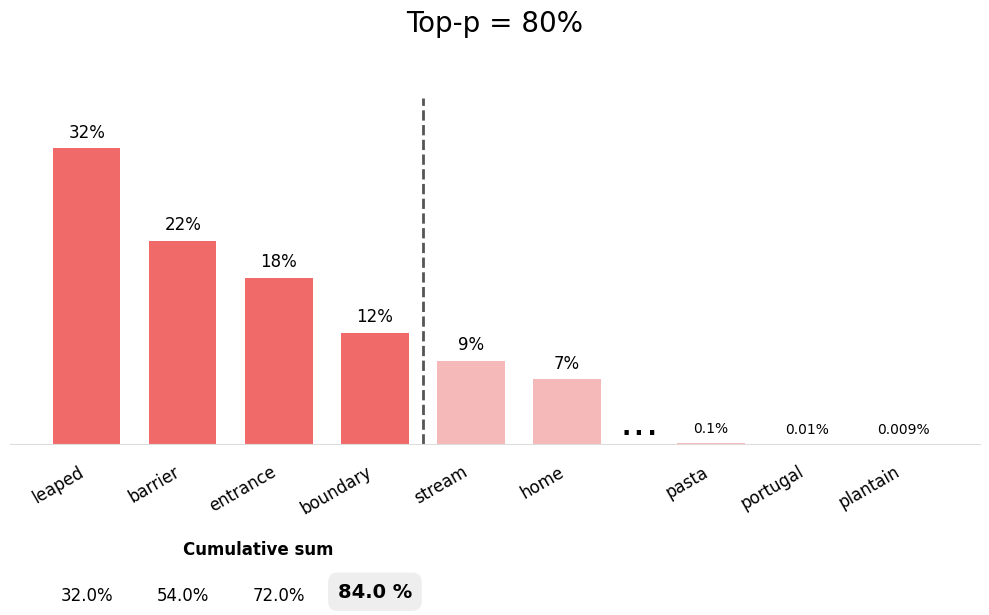

In [5]:
top_p = 80


# Calculate cumulative sum to find the nucleus for coloring
cumulative_probs = np.cumsum(percentages) # the same probabilities and text is used as in the cell above
nucleus_end_index = np.where(cumulative_probs >= top_p)[0][0]

# Colors for the bars
# Bars within the nucleus are a darker red, others are a lighter pink.
colors = ['#F06A6A' if i <= nucleus_end_index else '#F5B9B9' for i in range(len(words))]

# Separate data to create a gap for the ellipsis
words_part1 = words[:6]
probs_part1 = percentages[:6]
colors_part1 = colors[:6]

words_part2 = words[6:]
probs_part2 = percentages[6:]
colors_part2 = colors[6:]

# X-axis positions for the bars, creating a gap
x_pos_part1 = np.arange(len(words_part1))
gap = 1.5
x_pos_part2 = np.arange(len(words_part2)) + len(words_part1) + gap -1

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the two parts of the bar chart
bars1 = ax.bar(x_pos_part1, probs_part1, color=colors_part1, width=0.7)
bars2 = ax.bar(x_pos_part2, probs_part2, color=colors_part2, width=0.7)

# Set the title
ax.set_title(f'Top-p = {top_p}%', fontsize=20, pad=20)

# Remove axes and ticks for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_yticks([]) # Remove y-axis ticks

# Set x-axis labels
all_x_pos = np.concatenate([x_pos_part1, x_pos_part2])
all_words = np.concatenate([words_part1, words_part2])
ax.set_xticks(all_x_pos)
ax.set_xticklabels(all_words, rotation=30, ha='right', fontsize=12)
ax.tick_params(axis='x', pad=10)


# Add percentage labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    size=10 if height < 1 else 12
                    )
add_labels(bars1)
add_labels(bars2)

# Add ellipsis in the gap
ellipsis_pos = len(words_part1) + gap / 2 - 1
ax.text(ellipsis_pos, 1, '...', fontsize=30, ha='center')

# Add "Cumulative sum" text and values
ax.text(1, -12, 'Cumulative sum', ha='left', fontsize=12, weight='bold')
cum_sum_values = cumulative_probs[:nucleus_end_index]
for i, val in enumerate(cum_sum_values):
    ax.text(i, -17, f'{val}%', ha='center', fontsize=12)

# Add the vertical dashed line
line_pos = nucleus_end_index + 0.5
ax.axvline(x=line_pos, color='#555555', linestyle='--', linewidth=2, ymax=0.9)

# Add the final cumulative sum in a highlighted box
final_cum_sum = cumulative_probs[nucleus_end_index]
ax.text(line_pos-0.5, -16, f'{final_cum_sum} %', ha='center', va='center', fontsize=14, weight='bold',
        bbox=dict(facecolor='#EEEEEE', edgecolor='none', boxstyle='round,pad=0.5'))

# Adjust plot limits to make space for annotations at the bottom
ax.set_ylim(top=max(percentages) * 1.3)
ax.set_xlim(left=-0.8, right=len(all_words) + gap -1.2)


plt.tight_layout(rect=[0, 0.1, 1, 1]) # Adjust layout to prevent labels from being cut off
plt.show()